# GRIP_JULY - 2021  (TASK 6)

# Task Name:- Fault Detection System

# Domain:- Computer Vision and IOT

# Name:- Akash Singh

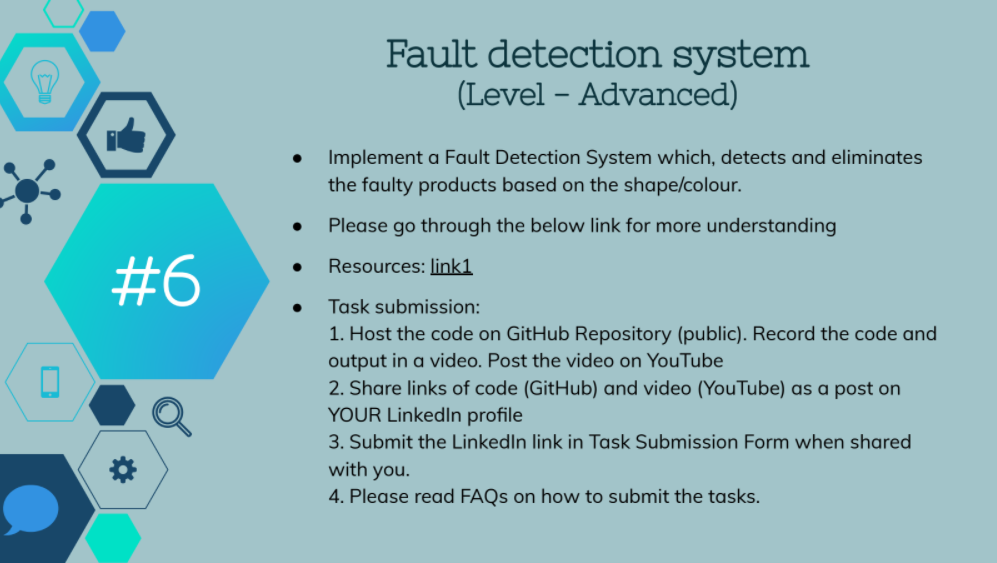

In [ ]:
import os
import cv2          ##imports open cv##
import numpy as np

IMAGE_SIZE = (500, 500)

THRESHOLD_VALUE = 110 ##Threshold Details##
MAX_VALUE = 255

INV_THRESHOLD_VALUE = 50 ##Invert Threshold Details##
INV_MAX_VALUE = 255
THRESHOLD1 = 100
THRESHOLD2 = 70

CON_COLOR = (0, 0, 255)
CON_THICKNESS = 1
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
GREEN = (0, 255, 0)
RED = (0, 0, 255)
STACK_IMG_SIZE = (200, 200)

################################

while True:
    files = os.listdir('Test images')
    print("======================================")
    print("=         TEST Images           =")
    print("======================================")
    for i in files:
        print('-> {}\t '.format(i), end='')
        if files.index(i) % 3 == 0 and files.index(i) != 0:
            print('\n')
    print("\n======================================")

    # need to select image name with the extension (ex: img1.jpeg)1
    file = input("Select a file from the directory(q- quit): ").strip()

    # quit program
    if file == 'q' or file == 'Q':
        break

    PATH = 'images/' + file
    # Image Path
    imageOri = cv2.imread(PATH)

    try:
        # converts to grayscale
        image = cv2.cvtColor(imageOri, cv2.COLOR_BGR2GRAY)
    except:
        print("Invalid Input! Please select correct file(ex: 'imgSample.jpg')")
    else:
        # resize image
        image = cv2.resize(image, IMAGE_SIZE)
        imageOri = cv2.resize(imageOri, IMAGE_SIZE)

        ret, thresh_basic = cv2.threshold(image, THRESHOLD_VALUE, MAX_VALUE, cv2.THRESH_BINARY)
        
        kernel = np.ones((5, 5), np.uint8)

        img_erosion = cv2.erode(thresh_basic, kernel, iterations=1)

       
        ret, thresh_inv = cv2.threshold(img_erosion, INV_THRESHOLD_VALUE, INV_MAX_VALUE, cv2.THRESH_BINARY_INV)
       

        #####################

       
        edged = cv2.Canny(img_erosion, THRESHOLD1, THRESHOLD2)
       
        contours, hierarchy = cv2.findContours(thresh_inv, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

        font = cv2.FONT_HERSHEY_SIMPLEX

        imageRz = cv2.resize(image, STACK_IMG_SIZE)
        thresh_basicRz = cv2.resize(thresh_basic, STACK_IMG_SIZE)
        img_erosionRz = cv2.resize(img_erosion, STACK_IMG_SIZE)
        thresh_invRz = cv2.resize(thresh_inv, STACK_IMG_SIZE)
        edgedRz = cv2.resize(edged, STACK_IMG_SIZE)

        imageRz = cv2.putText(imageRz, 'GrayScale', (5, 15), font, 0.5, WHITE, 1, cv2.LINE_AA)
        thresh_basicRz = cv2.putText(thresh_basicRz, 'ThresholdBasic', (5, 15), font,
                                     0.5, WHITE, 1,cv2.LINE_AA)
        img_erosionRz = cv2.putText(img_erosionRz, 'Morphology-Erosion', (5, 15), font,
                                    0.5, WHITE, 1, cv2.LINE_AA)
        thresh_invRz = cv2.putText(thresh_invRz, 'Threshold-mode INV', (5, 15), font,
                                   0.5, BLACK, 1, cv2.LINE_AA)
        edgedRz = cv2.putText(edgedRz, 'Canny Edges', (5, 15), font, 0.5, WHITE, 1, cv2.LINE_AA)

        numpy_horizontal_concat = np.concatenate((imageRz, thresh_basicRz, img_erosionRz,
                                                  thresh_invRz, edgedRz), axis=1)

        cv2.imshow('Filtering...', numpy_horizontal_concat)

        
        num_of_con = str(len(contours) - 1)
        print("Number of Contours found = " + num_of_con)
        if len(contours) > 1:
            print('======================================')
            print('=       ERRORS DETECTED            =')
            print('======================================\n\n')

        # show original img
        cv2.imshow('Original Image', imageOri)
        # draw contours on original img
        if int(num_of_con) != 0:
            for i in range(int(num_of_con)):
                highlighted_img = cv2.drawContours(imageOri, contours, i, CON_COLOR, CON_THICKNESS)

            highlighted_img = cv2.putText(highlighted_img, 'Approximately {} defect(s) detected'.
                                          format(num_of_con), (5, 15),
                                          font, 0.5, GREEN, 1, cv2.LINE_AA)
        else:
            highlighted_img = cv2.putText(imageOri, 'Unable to detect defects!',
                                          (5, 15), font, 0.5, RED, 2, cv2.LINE_AA)

        # show markings highlighted img
        cv2.imshow('Highlighted Defect', highlighted_img)
        # save image containing highlighted defect
        cv2.imwrite('Output Images/{}_DEFECTS_HIGHLIGHTED.jpg'.format(file.split('.')[0]), highlighted_img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

=         TEST Images           =
-> Test image 1.jpg	 -> Test image 2.jpg	 -> Test image 3.JPG	 -> Test image 4.JPG	 

-> Test image 5.JPG	 -> Test image 6.JPG	 -> Test image 7.JPG	 

-> Test image 8.jpeg	 -> Test image 9.jpeg	 
Select a file from the directory(q- quit): Test image 1.jpg
Invalid Input! Please select correct file(ex: 'imgSample.jpg')
=         TEST Images           =
-> Test image 1.jpg	 -> Test image 2.jpg	 -> Test image 3.JPG	 -> Test image 4.JPG	 

-> Test image 5.JPG	 -> Test image 6.JPG	 -> Test image 7.JPG	 

-> Test image 8.jpeg	 -> Test image 9.jpeg	 
